In [1]:
from math import log as ln
import os
from csv import reader, writer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Importo todos los .py que pueda llegar a necesitar.

#Creamos una función que limpia automaticamente cada año de la base de datos, eliminando columnas vacias y dejando solamente las importantes.
def limpieza():
    dfs_lim = {}
    for año in range(2015, 2025):
        sheet_name = str(año)
        df = pd.read_excel(
            "OCUP_I_03.xlsx", sheet_name=sheet_name, header=2)
        print(
            f"El año {año} tiene {len(df.columns)} columnas previas")
        df = df.iloc[:19]
        df.index = df['Unnamed: 0']
        df.index = df.index.rename('Mediciones')
        df = df.loc[:, ~df.columns.str.contains("Unnamed")]
        nombres_base = ['Total', 'Varon',
                        'Mujer', 'Distribucion Porcentual']
        if sheet_name == "2024":
            trimestres = ['T1', 'T2', 'T3'] #El año 2024 tiene solamente 3 Trimestres cargados, así que usamos solo 3 columnas para dicho año.
        else:
            trimestres = ['T1', 'T2', 'T3', 'T4']
        nuevos_nombres = [
            f"{nombre}{trim}" for trim in trimestres for nombre in nombres_base]
        df.columns = nuevos_nombres
        df = df.fillna("")
        df = df.apply(pd.to_numeric, errors='coerce').round(2)
        dfs_lim[año] = df
        df.to_excel(f"IngresosPromedio{año}.xlsx", index=True) #Crea un archivo excel para cada año.
        print(
            f'El año {año} ahora tiene {len(df.columns)} columnas y ha sido limpiado.')

    return dfs_lim

In [2]:
#Creamos una funcion que itera en cada fila de servicios de todos los años, y las junta en un solo archivo de excel.
def juntar_fila(row_name, dfs_dict):
    filas = []
    for año, df in dfs_dict.items():
        if row_name in df.index:
            fila = df.loc[row_name].copy()
            fila.name = año
            filas.append(fila)
        else:
            print(f"El año {año} no contiene la fila '{row_name}'")
    resultado = pd.DataFrame(filas)
    resultado.to_excel(f"Servicios.xlsx", index=True)
    return resultado
    
#Ejecutamos
dfs_lim = limpieza()
datos_servicios = juntar_fila("Servicios", dfs_lim)

El año 2015 tiene 33 columnas previas
El año 2015 ahora tiene 16 columnas y ha sido limpiado.
El año 2016 tiene 33 columnas previas
El año 2016 ahora tiene 16 columnas y ha sido limpiado.
El año 2017 tiene 33 columnas previas
El año 2017 ahora tiene 16 columnas y ha sido limpiado.
El año 2018 tiene 36 columnas previas
El año 2018 ahora tiene 16 columnas y ha sido limpiado.
El año 2019 tiene 33 columnas previas
El año 2019 ahora tiene 16 columnas y ha sido limpiado.
El año 2020 tiene 34 columnas previas
El año 2020 ahora tiene 16 columnas y ha sido limpiado.
El año 2021 tiene 33 columnas previas
El año 2021 ahora tiene 16 columnas y ha sido limpiado.
El año 2022 tiene 34 columnas previas
El año 2022 ahora tiene 16 columnas y ha sido limpiado.
El año 2023 tiene 33 columnas previas
El año 2023 ahora tiene 16 columnas y ha sido limpiado.
El año 2024 tiene 25 columnas previas
El año 2024 ahora tiene 12 columnas y ha sido limpiado.


In [3]:
#Cargamos una base de datos auxiliar, que es el valor del dolar oficial para cada día desde 1970. Limpiamos los datos así me devuelve el valor por cuatrimestre
def ajuste_dolar():
    df = pd.read_csv("tipos-de-cambio-historicos.csv")
    df = df.set_index('indice_tiempo')
    df.index = pd.to_datetime(df.index)
    df.index.name = "Fecha"
    df = df.fillna("")
    df = df.loc['2015-01-01':'2024-12-31']
    df = df[['dolar_estadounidense']]
    df = df.rename(columns={'dolar_estadounidense': 'Dolar_oficial'})
    df_trimestres = df.resample('QE').last().round(2)
    df_trimestres = df_trimestres.transpose()
    df_trimestres.to_excel(f"DolarOficial.xlsx", index=True)

    return df_trimestres
ajuste_dolar()

Fecha,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30,2016-09-30,2016-12-31,2017-03-31,2017-06-30,...,2022-09-30,2022-12-31,2023-03-31,2023-06-30,2023-09-30,2023-12-31,2024-03-31,2024-06-30,2024-09-30,2024-12-31
Dolar_oficial,8.822,9.088,9.422,13.04,14.7,15.04,15.31,15.89,15.39,16.601,...,147.32,177.16,209.01,256.7,349.9501,808.4501,858.0001,912.0,970.5,1032.0


In [5]:
#La base de datos previamente limpiada del Dólar Oficial, la ordenamos por año, así comparte cant. de filas y nombre de índices con la de Servicios.
def limpieza_dolar():
    valoresdolar = []
    df_total = pd.DataFrame()
    for año in range(2015, 2025):
        df_dolar = pd.read_excel("DolarOficial.xlsx")
        df_dolar.columns = df_dolar.columns.astype(str)
        df_dolar = df_dolar.drop(
            df_dolar.columns[~df_dolar.columns.str.contains(f'{año}')], axis=1)
        df_dolar_cnombres = ['T1', 'T2', 'T3', 'T4']
        df_dolar.index = [f'{año}']
        df_dolar.columns = df_dolar_cnombres
        print(df_dolar)
        df_total = pd.concat([df_total, df_dolar])
        valoresdolar.append(df_dolar.iloc[0].tolist())
    df_total.to_excel("DolarValorTrimestres.xlsx", index=True)
    return valoresdolar

limpieza_dolar()

         T1     T2     T3     T4
2015  8.822  9.088  9.422  13.04
        T1     T2     T3     T4
2016  14.7  15.04  15.31  15.89
         T1      T2     T3      T4
2017  15.39  16.601  17.33  18.649
          T1     T2     T3    T4
2018  20.149  28.85  41.25  37.7
          T1     T2      T3     T4
2019  43.345  42.45  57.595  59.89
          T1     T2     T3     T4
2020  64.469  70.46  76.18  84.15
      T1     T2     T3      T4
2021  92  95.72  98.74  102.72
          T1      T2      T3      T4
2022  111.01  125.23  147.32  177.16
          T1     T2        T3        T4
2023  209.01  256.7  349.9501  808.4501
            T1   T2     T3    T4
2024  858.0001  912  970.5  1032


[[8.822, 9.088, 9.422, 13.04],
 [14.7, 15.04, 15.31, 15.89],
 [15.39, 16.601, 17.33, 18.649],
 [20.149, 28.85, 41.25, 37.7],
 [43.345, 42.45, 57.595, 59.89],
 [64.469, 70.46, 76.18, 84.15],
 [92.0, 95.72, 98.74, 102.72],
 [111.01, 125.23, 147.32, 177.16],
 [209.01, 256.7, 349.9501, 808.4501],
 [858.0001, 912.0, 970.5, 1032.0]]

In [6]:
#Del excel de servicios, limpiamos para que solamente me diga el ingreso promedio, no el porcentaje de ocupados en dicha área. Y llenamos los NaN con un valor.
df = pd.read_excel(
    "Servicios.xlsx")
df.columns = df.columns.astype(str)
df = df.drop(df.columns[df.columns.str.contains("Porcen")], axis=1)
df.index = df['Unnamed: 0']
df = df.drop(['Unnamed: 0'], axis=1)
df.index.name = 'Años'
df = df.fillna('1')
df.to_excel(f"ServiciosDolar.xlsx", index=True)


In [7]:
#Traemos ambas bases de datos (Dolar Oficial por trimestre) y Servicios. Repetimos columnas así hay misma cantidad de filas y columnas en ambos archivos excel.
df_dolar = pd.read_excel("DolarValorTrimestres.xlsx", index_col=0).round(2)
df_servicios = pd.read_excel("ServiciosDolar.xlsx", index_col=0).astype(int)
df_dolar_ajustado = pd.concat([df_dolar[['T1']], df_dolar[['T1']], df_dolar[['T1']],
                               df_dolar[['T2']], df_dolar[[
                                   'T2']], df_dolar[['T2']],
                               df_dolar[['T3']], df_dolar[['T3']], df_dolar[['T3']], df_dolar[['T4']], df_dolar[['T4']], df_dolar[['T4']]],
                              axis=1)

nombres = df.columns
df_dolar_ajustado.columns = nombres
df_unido = pd.concat([df_servicios, df_dolar_ajustado])
#Creamos un solo archivo que contiene los ingresos promedios divididos por el Dolar oficial en cada trimestre pertinente. 
df_unido = (df_servicios / df_dolar_ajustado).round(2)
df_unido.to_excel("archivo_unido.xlsx") 
#Preparamos para crear un gráfico.
df_unido = df_unido.reset_index()
print(df_unido)


   Años  TotalT1  VaronT1  MujerT1  TotalT2  VaronT2  MujerT2  TotalT3  \
0  2015  1193.42  1324.60  1057.14  1269.75  1376.35  1159.30  1238.75   
1  2016   954.97  1058.03   852.72  1003.32  1143.68   856.38  1019.66   
2  2017  1244.12  1258.41  1229.24  1187.17  1245.18  1125.96  1185.52   
3  2018  1148.09  1254.24  1042.38   863.74   945.06   782.74   628.97   
4  2019   746.31   860.38   631.61   787.23   869.09   699.72   703.28   
5  2020   703.04   761.47   644.61   691.91   748.77   638.65   659.16   
6  2021   643.68   684.88   602.87   712.94   768.77   659.62   746.98   
7  2022   881.09   980.12   775.03   911.75   959.43   858.30   902.42   
8  2023   865.00   958.75   765.20   844.56   921.50   774.62   818.27   
9  2024   640.48   682.11   601.11   847.24   916.73   780.57   923.14   

   VaronT3  MujerT3  TotalT4  VaronT4  MujerT4  
0  1337.90  1137.79  1028.68  1137.12   918.94  
1  1119.92   908.10  1095.22  1176.46  1010.26  
2  1276.40  1083.84  1233.46  1346.70 

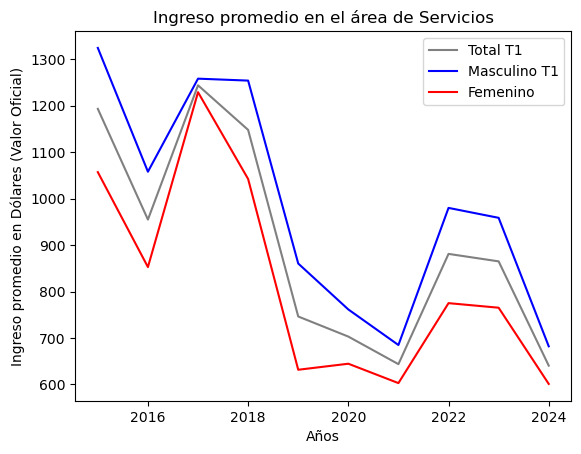

In [8]:
x1 = df_unido['Años']
y1 = df_unido['TotalT1']
x2 = df_unido['Años']
y2 = df_unido['VaronT1']
x3 = df_unido['Años']
y3 = df_unido['MujerT1']

plt.plot(x1, y1, color='grey', label="Total T1")
plt.plot(x2, y2, color='blue', label="Masculino T1")
plt.plot(x3, y3, color='red', label="Femenino T1")

plt.xlabel("Años")
plt.ylabel("Ingreso promedio en Dólares (Valor Oficial)")
plt.title('Ingreso promedio en el área de Servicios')

plt.legend()
plt.show()